In [46]:
import importlib

import torch
import numpy as np
import matplotlib.pyplot as plt

import decision_learning.data.shortest_path_grid
importlib.reload(decision_learning.data.shortest_path_grid)
from decision_learning.data.shortest_path import piecewise_linear

### Testing Piecewise Linear Function

2024-09-30 17:48:38,877 - decision_learning.data.shortest_path - DEBUG - chg_pt: 0.55
2024-09-30 17:48:38,878 - decision_learning.data.shortest_path - DEBUG - chg_pt: 0.0


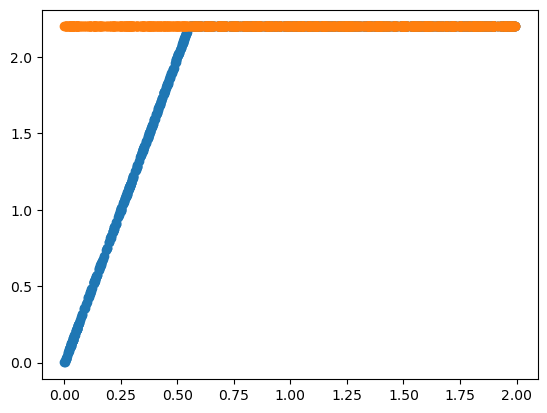

In [2]:
rnd = np.random.RandomState(1)
x = rnd.uniform(low=0, 
            high=2, 
            size=1000)
y_red = piecewise_linear(x,
                    slope0=4, 
                    int0=0,
                    slope1=0, 
                    int1=2.2)
y_blue = piecewise_linear(x,
                    slope0=0, 
                    int0=2.2,
                    slope1=0, 
                    int1=2.2)
plt.scatter(x, y_red)
plt.scatter(x, y_blue)

In [3]:
# Assume list1 and list2 are your lists of arrays
list1 = np.array([1, 2, 3]) 
list2 = np.array([4, 5, 6])

# Concatenate the lists
combined = np.concatenate((list1,list2))

# # Create an array of all possible indices
# all_indices = np.arange(max(combined) + 1)

# # Find the indices not in the combined list
# not_in_combined = np.setdiff1d(all_indices, combined)

# Generate Data

In [5]:
importlib.reload(decision_learning.data.shortest_path)
from decision_learning.data.shortest_path import add_noise, genDataPlant, shortest_path_synthetic_sym_no_noise, shortest_path_synthetic_plant_path

In [6]:
indices_arr = torch.randperm(100000)
indices_arr_test = torch.randperm(100000)

sim = 0
n_arr = [200, 400, 800, 1600]
ep_arr = ['unif', 'normal']
trials = 100

exp_arr = []
for n in n_arr:
    for ep in ep_arr:
        for t in range(trials):
            exp_arr.append([n, ep, t])

exp = exp_arr[sim]
ep_type = exp[1]
trial = exp[2]

# generate data
grid = (5, 5)  # grid size
num_data = exp[0]  # number of training data
num_feat = 5  # size of feature
deg = 6  # polynomial degree
e = .4  # noise width



In [35]:
importlib.reload(decision_learning.data.shortest_path)
from decision_learning.data.shortest_path import add_noise, genData, genDataPlant, shortest_path_synthetic_sym_no_noise, shortest_path_synthetic_plant_path

In [25]:
planted_good_pwl_params = {'slope0':0, 
                    'int0':2,
                    'slope1':0, 
                    'int1':2}
planted_bad_pwl_params = {'slope0':4, 
                    'int0':0,
                    'slope1':0, 
                    'int1':2.2}

In [26]:
data = shortest_path_synthetic_sym_no_noise(num_data=num_data+200,
        num_features=num_feat, 
        grid=grid, 
        deg=deg, 
        seed=indices_arr[trial])


data_plant = shortest_path_synthetic_plant_path(planted_good_pwl_params=planted_good_pwl_params,
                                   planted_bad_pwl_params=planted_bad_pwl_params,
                                   seed=indices_arr[trial],
                                   **data)
data_noise = add_noise(c=data_plant['c_plant'],
          noise_type=ep_type,
          noise_width=e,
          seed=indices_arr[trial])

2024-10-01 13:22:39,745 - decision_learning.data.shortest_path - DEBUG - good_bad_edges: [ 1  4  9 16 24 31 36 39  0  3  8 15 23 30 35 38], remain_edges: [ 2  5  6  7 10 11 12 13 14 17 18 19 20 21 22 25 26 27 28 29 32 33 34 37]
2024-10-01 13:22:39,746 - decision_learning.data.shortest_path - DEBUG - chg_pt: 0.0
2024-10-01 13:22:39,746 - decision_learning.data.shortest_path - DEBUG - chg_pt: 0.55


One genData Function

In [36]:
final_data = genData(num_data=num_data+200,
        num_features=num_feat, 
        grid=grid, 
        deg=deg, 
        noise_type=ep_type,
        noise_width=e,
        seed=indices_arr[trial],     
        plant_edges=False,
        planted_good_pwl_params=planted_good_pwl_params,
        planted_bad_pwl_params=planted_bad_pwl_params)

In [54]:
final_data['cost'].shape

(400, 40)

In [48]:
import decision_learning.modeling.models
importlib.reload(decision_learning.modeling.models)
from decision_learning.modeling.models import LinearRegression

In [56]:
lr_mod = LinearRegression(input_dim=final_data['feat'].shape[1],
                 output_dim=final_data['cost'].shape[1])

tensor([[ 2.0115,  0.7579,  1.3459, -0.8859, -1.3974],
        [ 0.5499, -2.2782, -0.6105,  0.5189,  1.9282],
        [-0.0867,  0.4362,  0.5707, -0.9414,  1.8028],
        ...,
        [-0.6134, -0.7305, -0.0533, -0.9726,  0.5547],
        [-0.3720, -1.0784,  1.3394,  1.2146, -0.4467],
        [ 0.5275,  0.5807,  1.2051, -0.2589, -0.0513]])

In [62]:
c_pred = lr_mod(torch.tensor(final_data['feat'], dtype=torch.float))

In [64]:
c_pred.shape

torch.Size([400, 40])